In [1]:
import numpy as np
import xarray as xr
import fsspec
import matplotlib
import matplotlib.pyplot as plt
import pyqg 
import pyqg.diagnostic_tools as tools
import seaborn as sns

%matplotlib inline

In [2]:
eddy_model = pyqg.QGModel(nx=128, dt=1800, tmax=311040000.0, twrite=10000, tavestart=155520000.0) #defaults match up to Ross paper 

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized


## Run initial simulation

In [3]:
# run simulation to gather data initially

## From here, you can call .run() to run a new simulation
eddy_model.run()

## Convert to xarray Datasets
eddy_model_highRes = eddy_model.to_dataset()

INFO: Step: 10000, Time: 1.80e+07, KE: 6.04e-07, CFL: 0.006
INFO: Step: 20000, Time: 3.60e+07, KE: 5.17e-06, CFL: 0.006
INFO: Step: 30000, Time: 5.40e+07, KE: 6.46e-05, CFL: 0.013
INFO: Step: 40000, Time: 7.20e+07, KE: 5.39e-04, CFL: 0.040
INFO: Step: 50000, Time: 9.00e+07, KE: 6.69e-04, CFL: 0.064
INFO: Step: 60000, Time: 1.08e+08, KE: 5.83e-04, CFL: 0.065
INFO: Step: 70000, Time: 1.26e+08, KE: 5.43e-04, CFL: 0.053
INFO: Step: 80000, Time: 1.44e+08, KE: 5.50e-04, CFL: 0.061
INFO: Step: 90000, Time: 1.62e+08, KE: 5.37e-04, CFL: 0.061
INFO: Step: 100000, Time: 1.80e+08, KE: 5.79e-04, CFL: 0.054
INFO: Step: 110000, Time: 1.98e+08, KE: 5.71e-04, CFL: 0.051
INFO: Step: 120000, Time: 2.16e+08, KE: 5.98e-04, CFL: 0.059
INFO: Step: 130000, Time: 2.34e+08, KE: 6.03e-04, CFL: 0.047
INFO: Step: 140000, Time: 2.52e+08, KE: 6.00e-04, CFL: 0.060
INFO: Step: 150000, Time: 2.70e+08, KE: 6.22e-04, CFL: 0.050
INFO: Step: 160000, Time: 2.88e+08, KE: 6.41e-04, CFL: 0.058
INFO: Step: 170000, Time: 3.06e+0

In [4]:
# after initial run, generate snapshots of model

def generate_snapshots(model):
    snapshots = []
    snapshots.append(model.to_dataset())
    for _ in model.run_with_snapshots(tsnapint=1000*model.dt):
        snapshots.append(model.to_dataset())
    return xr.concat(snapshots, dim='time')

eddy_model_highRes = generate_snapshots(eddy_model)
eddy_model_highRes

<xarray.Dataset>
Dimensions:            (time: 1, lev: 2, y: 128, x: 128, l: 128, k: 65,
                        lev_mid: 1)
Coordinates:
  * time               (time) float64 3.11e+08
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * x                  (x) float64 3.906e+03 1.172e+04 ... 9.883e+05 9.961e+05
  * y                  (y) float64 3.906e+03 1.172e+04 ... 9.883e+05 9.961e+05
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * k                  (k) float64 0.0 6.283e-06 ... 0.0003958 0.0004021
Data variables: (12/32)
    q                  (time, lev, y, x) float64 3.223e-06 ... 8.525e-07
    u                  (time, lev, y, x) float64 -0.04136 -0.04677 ... -0.004741
    v                  (time, lev, y, x) float64 -0.01139 0.0135 ... -0.007047
    ufull              (time, lev, y, x) float64 -0.01636 -0.02177 ... -0.004741
    vfull              (time, lev, y, x) float64 -0.01139 0.0135 ... -0.007047
    qh                 (time, lev, l, k) complex128 (0.009549001533785476+0j)...
    ...                 ...
    ENSgenspec         (time, l, k) float64 0.0 3.643e-24 ... 7.284e-65
    ENSfrictionspec    (time, l, k) float64 0.0 -2.892e-24 ... -2.33e-63
    APEgenspec         (time, l, k) float64 0.0 8.197e-16 ... 1.639e-56
    APEflux            (time, l, k) float64 -0.0 6.541e-15 ... 1.47e-36
    KEflux             (time, l, k) float64 0.0 2.47e-16 ... 2.025e-31 5.696e-34
    APEgen             (time) float64 7.665e-11
Attributes: (12/23)
    pyqg:beta:       1.5e-11
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         1800.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         172800
    pyqg:tmax:       311040000.0
    pyqg:twrite:     10000
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [5]:
# write data to scratch bucket after initial run

import os
import xarray as xr
SCRATCH_BUCKET = os.environ['SCRATCH_BUCKET'] 
eddy_model_highRes.to_zarr('gs://leap-scratch/panalluri/eddy/highRes.zarr')  # write data

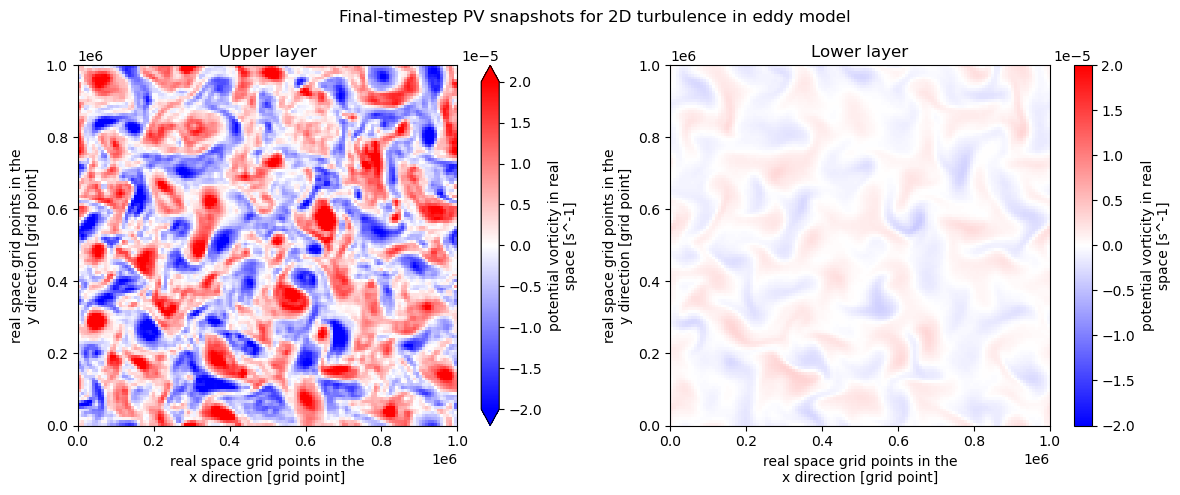

In [6]:
plt.figure(figsize=(12,5)).suptitle("Final-timestep PV snapshots for 2D turbulence in eddy model")
plt.subplot(121); eddy_model_highRes.q.isel(lev=0, time=-1).plot(vmin=-2e-5, vmax=2e-5, cmap='bwr'); plt.title("Upper layer")
plt.subplot(122); eddy_model_highRes.q.isel(lev=1, time=-1).plot(vmin=-2e-5, vmax=2e-5, cmap='bwr'); plt.title( "Lower layer")
plt.tight_layout()

## Low-res simulation

In [9]:
eddy_model2 = pyqg.QGModel(nx=64, dt=1800, tmax=311040000.0, twrite=10000, tavestart=155520000.0) #defaults match up to Ross paper 

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized


In [10]:
# run simulation to gather data initially

## From here, you can call .run() to run a new simulation
eddy_model2.run()

## Convert to xarray Datasets
eddy_model_test = eddy_model2.to_dataset()

INFO: Step: 10000, Time: 1.80e+07, KE: 1.27e-06, CFL: 0.003
INFO: Step: 20000, Time: 3.60e+07, KE: 1.03e-05, CFL: 0.003
INFO: Step: 30000, Time: 5.40e+07, KE: 1.10e-04, CFL: 0.009
INFO: Step: 40000, Time: 7.20e+07, KE: 5.19e-04, CFL: 0.027
INFO: Step: 50000, Time: 9.00e+07, KE: 5.09e-04, CFL: 0.025
INFO: Step: 60000, Time: 1.08e+08, KE: 4.37e-04, CFL: 0.024
INFO: Step: 70000, Time: 1.26e+08, KE: 5.15e-04, CFL: 0.023
INFO: Step: 80000, Time: 1.44e+08, KE: 5.50e-04, CFL: 0.023
INFO: Step: 90000, Time: 1.62e+08, KE: 5.17e-04, CFL: 0.021
INFO: Step: 100000, Time: 1.80e+08, KE: 5.11e-04, CFL: 0.021
INFO: Step: 110000, Time: 1.98e+08, KE: 5.03e-04, CFL: 0.025
INFO: Step: 120000, Time: 2.16e+08, KE: 4.71e-04, CFL: 0.027
INFO: Step: 130000, Time: 2.34e+08, KE: 4.65e-04, CFL: 0.022
INFO: Step: 140000, Time: 2.52e+08, KE: 4.87e-04, CFL: 0.024
INFO: Step: 150000, Time: 2.70e+08, KE: 4.64e-04, CFL: 0.025
INFO: Step: 160000, Time: 2.88e+08, KE: 4.71e-04, CFL: 0.021
INFO: Step: 170000, Time: 3.06e+0

In [11]:
eddy_model_test = generate_snapshots(eddy_model2)
eddy_model_test

<xarray.Dataset>
Dimensions:            (time: 1, lev: 2, y: 64, x: 64, l: 64, k: 33, lev_mid: 1)
Coordinates:
  * time               (time) float64 3.11e+08
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * x                  (x) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * k                  (k) float64 0.0 6.283e-06 ... 0.0001948 0.0002011
Data variables: (12/32)
    q                  (time, lev, y, x) float64 7.09e-06 ... -1.146e-06
    u                  (time, lev, y, x) float64 -0.00754 -0.02821 ... 0.003693
    v                  (time, lev, y, x) float64 0.04902 0.0314 ... 0.002397
    ufull              (time, lev, y, x) float64 0.01746 -0.003209 ... 0.003693
    vfull              (time, lev, y, x) float64 0.04902 0.0314 ... 0.002397
    qh                 (time, lev, l, k) complex128 (0.0024210590022264457+0j...
    ...                 ...
    ENSgenspec         (time, l, k) float64 0.0 -1.816e-24 ... 1.208e-62
    ENSfrictionspec    (time, l, k) float64 0.0 -2.688e-24 ... -5.883e-61
    APEgenspec         (time, l, k) float64 0.0 -4.086e-16 ... 2.717e-54
    APEflux            (time, l, k) float64 -0.0 2.734e-15 ... 7.912e-34
    KEflux             (time, l, k) float64 0.0 -3.633e-16 ... 2.783e-32
    APEgen             (time) float64 6.435e-11
Attributes: (12/23)
    pyqg:beta:       1.5e-11
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         1800.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         172800
    pyqg:tmax:       311040000.0
    pyqg:twrite:     10000
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [12]:
# write data to scratch bucket after initial run

import os
import xarray as xr
SCRATCH_BUCKET = os.environ['SCRATCH_BUCKET'] 
eddy_model_test.to_zarr('gs://leap-scratch/panalluri/eddy/lowRes.zarr')  # write data

## Coarsen data

In [13]:
import pyqg_parameterization_benchmarks.coarsening_ops as coarsening

In [14]:
op1 = coarsening.Operator1(eddy_model, 64) #for now, need to re-run above simulation for this to work -- maybe make a coarsening data section w/ and w/o the op1 data structure?
op1.m2.to_dataset()

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized


<xarray.Dataset>
Dimensions:  (time: 1, lev: 2, y: 64, x: 64, l: 64, k: 33, lev_mid: 1)
Coordinates:
  * time     (time) float64 0.0
  * lev      (lev) int64 1 2
  * lev_mid  (lev_mid) float64 1.5
  * x        (x) float64 7.812e+03 2.344e+04 3.906e+04 ... 9.766e+05 9.922e+05
  * y        (y) float64 7.812e+03 2.344e+04 3.906e+04 ... 9.766e+05 9.922e+05
  * l        (l) float64 0.0 6.283e-06 1.257e-05 ... -1.257e-05 -6.283e-06
  * k        (k) float64 0.0 6.283e-06 1.257e-05 ... 0.0001948 0.0002011
Data variables: (12/14)
    q        (time, lev, y, x) float64 7.748e-07 5.537e-07 ... 3.376e-07
    u        (time, lev, y, x) float64 -0.03922 -0.05527 ... 0.000443 -0.002347
    v        (time, lev, y, x) float64 0.003705 0.008953 ... -0.01891 -0.01649
    ufull    (time, lev, y, x) float64 -0.01422 -0.03027 ... 0.000443 -0.002347
    vfull    (time, lev, y, x) float64 0.003705 0.008953 ... -0.01891 -0.01649
    qh       (time, lev, l, k) complex128 (0.002387250383446369+0j) ... (8.06...
    ...       ...
    ph       (time, lev, l, k) complex128 0j ... (-1.353123515349493e-13+3.29...
    dqhdt    (time, lev, l, k) complex128 0j 0j 0j 0j 0j 0j ... 0j 0j 0j 0j 0j
    Ubg      (lev) float64 0.025 0.0
    Qy       (lev) float64 1.039e-10 -7.222e-12
    dqdt     (time, lev, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    p        (time, lev, y, x) float64 -48.86 24.54 236.2 ... 525.4 334.7 31.93
Attributes: (12/23)
    pyqg:beta:       1.5e-11
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         1800.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       1576800000.0
    pyqg:twrite:     1000.0
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [15]:
# Helper function to display plots
def imshow(arr, vlim=3e-5):
    plt.xticks([]); plt.yticks([])
    return plt.imshow(arr, vmin=-vlim, vmax=vlim, cmap='bwr', interpolation='none')

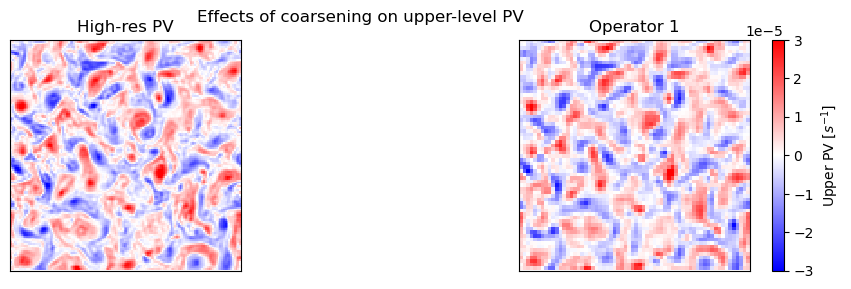

In [16]:
# Visualizing effects on upper-level PV
fig = plt.figure(figsize=(14.5,3))
plt.suptitle('Effects of coarsening on upper-level PV')
plt.subplot(1,2,1, title='High-res PV')
imshow(eddy_model.q[0])
plt.subplot(1,2,2, title='Operator 1')
im = imshow(op1.m2.q[0])
fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('Upper PV [$s^{-1}$]')

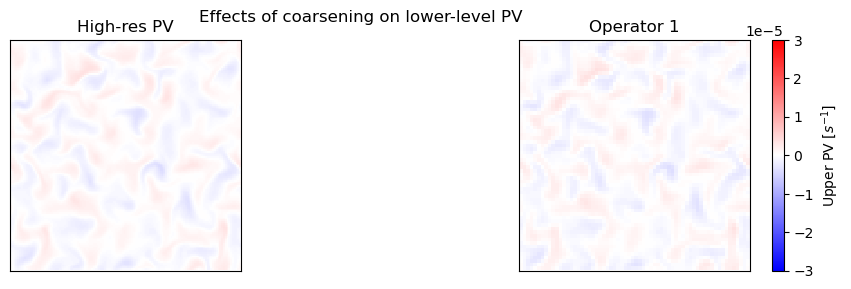

In [17]:
# Visualizing effects on lower-level PV
fig = plt.figure(figsize=(14.5,3))
plt.suptitle('Effects of coarsening on lower-level PV')
plt.subplot(1,2,1, title='High-res PV')
imshow(eddy_model.q[1])
plt.subplot(1,2,2, title='Operator 1')
im = imshow(op1.m2.q[1])
fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('Upper PV [$s^{-1}$]')

Text(0.5, 0.98, 'Effects on upper PV forcing term')

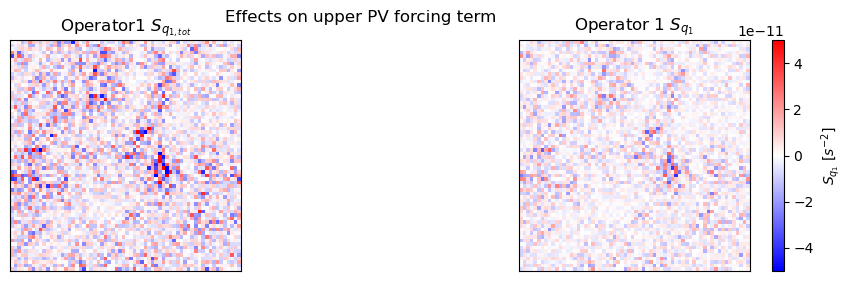

In [18]:
# Visualizing effects on upper PV forcing term
fig = plt.figure(figsize=(14.5,3))
plt.subplot(1,2,1, title='Operator1 $S_{q_{1,tot}}$')
imshow(op1.q_forcing_total[0], 3e-11)
plt.subplot(1,2,2, title='Operator 1' + " $S_{q_1}$")
im = imshow(op1.subgrid_forcing('q')[0], 5e-11)
cb = fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('$S_{q_1}$ [$s^{-2}$]')
plt.suptitle('Effects on upper PV forcing term')

Text(0.5, 0.98, 'Effects on lower PV forcing term')

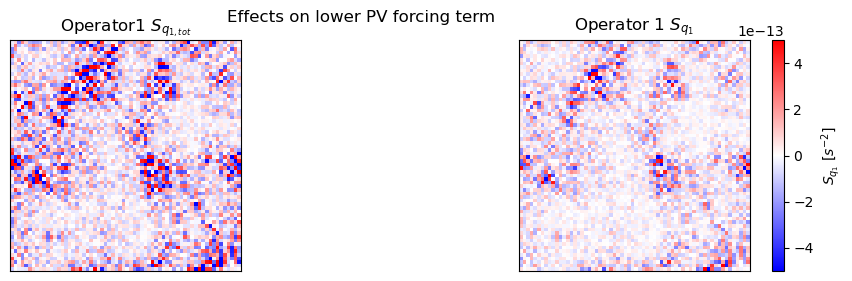

In [23]:
# Visualizing effects on lower PV forcing term
fig = plt.figure(figsize=(14.5,3))
plt.subplot(1,2,1, title='Operator1 $S_{q_{1,tot}}$')
imshow(op1.q_forcing_total[1], 3e-13)
plt.subplot(1,2,2, title='Operator 1' + " $S_{q_1}$")
im = imshow(op1.subgrid_forcing('q')[1], 5e-13)
cb = fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('$S_{q_1}$ [$s^{-2}$]')
plt.suptitle('Effects on lower PV forcing term')

## Train FCNN

In [24]:
from pyqg_parameterization_benchmarks.neural_networks import FCNNParameterization, FullyCNN

In [25]:
#if SGS forcing params haven't been added into forcing operator dataset yet

training_ds = op1.m2.to_dataset()
q_subs = op1.subgrid_forcing('q')
q_tot_subs = op1.q_forcing_total
u_subs = op1.subgrid_forcing('u')
v_subs = op1.subgrid_forcing('v')
uu_subs, uv_subs = op1.subgrid_fluxes('u')
vu_subs, vv_subs = op1.subgrid_fluxes('v')
qu_subs, qv_subs = op1.subgrid_fluxes('q')
training_dss = training_ds.assign(q_subgrid_forcing=training_ds['dqdt'] * 0 + q_subs, 
                                  q_forcing_total=training_ds['dqdt'] * 0 + q_tot_subs,
                                  v_subgrid_forcing=training_ds['dqdt'] * 0 + v_subs,
                                  u_subgrid_forcing=training_ds['dqdt'] * 0 + u_subs,
                                  uu_subgrid_flux=training_ds['dqdt'] * 0 + uu_subs,
                                  uv_subgrid_flux=training_ds['dqdt'] * 0 + uv_subs, 
                                  vv_subgrid_flux=training_ds['dqdt'] * 0 + vv_subs, 
                                  uq_subgrid_flux=training_ds['dqdt'] * 0 + qu_subs,
                                  vq_subgrid_flux=training_ds['dqdt'] * 0 + qv_subs)
training_dss

<xarray.Dataset>
Dimensions:            (time: 1, lev: 2, y: 64, x: 64, l: 64, k: 33, lev_mid: 1)
Coordinates:
  * time               (time) float64 0.0
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * x                  (x) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * k                  (k) float64 0.0 6.283e-06 ... 0.0001948 0.0002011
Data variables: (12/23)
    q                  (time, lev, y, x) float64 7.748e-07 ... 3.376e-07
    u                  (time, lev, y, x) float64 -0.03922 -0.05527 ... -0.002347
    v                  (time, lev, y, x) float64 0.003705 0.008953 ... -0.01649
    ufull              (time, lev, y, x) float64 -0.01422 -0.03027 ... -0.002347
    vfull              (time, lev, y, x) float64 0.003705 0.008953 ... -0.01649
    qh                 (time, lev, l, k) complex128 (0.002387250383446369+0j)...
    ...                 ...
    u_subgrid_forcing  (time, lev, y, x) float64 4.782e-08 ... -3.852e-10
    uu_subgrid_flux    (time, lev, y, x) float64 -8.812e-05 ... 5.811e-08
    uv_subgrid_flux    (time, lev, y, x) float64 0.0001338 ... -4.312e-07
    vv_subgrid_flux    (time, lev, y, x) float64 0.0002179 ... 1.422e-05
    uq_subgrid_flux    (time, lev, y, x) float64 -3.451e-08 ... -9.286e-10
    vq_subgrid_flux    (time, lev, y, x) float64 5.712e-08 ... 4.393e-09
Attributes: (12/23)
    pyqg:beta:       1.5e-11
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         1800.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       1576800000.0
    pyqg:twrite:     1000.0
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [26]:
# save coarsening data to scratch bucket

import os
import xarray as xr
SCRATCH_BUCKET = os.environ['SCRATCH_BUCKET'] 
training_dss.to_zarr('gs://leap-scratch/panalluri/eddy/coarseningOp1.zarr')  # write data

In [27]:
param = FCNNParameterization.train_on(training_dss, '/home/jovyan/pyqg_parameterization_benchmarks/testing/eddy',
                                      inputs=['q', 'u', 'v'], 
                                      targets = ['q_subgrid_forcing']) 

Loss after Epoch 1: 1.2997398376464844
Loss after Epoch 2: 1.151982069015503
Loss after Epoch 3: 1.0173149108886719
Loss after Epoch 4: 0.8983489274978638
Loss after Epoch 5: 0.8143225908279419
Loss after Epoch 6: 0.7463661432266235
Loss after Epoch 7: 0.6770842671394348
Loss after Epoch 8: 0.6109189391136169
Loss after Epoch 9: 0.5442091226577759
Loss after Epoch 10: 0.48405689001083374
Loss after Epoch 11: 0.42485472559928894
Loss after Epoch 12: 0.36949241161346436
Loss after Epoch 13: 0.3193501830101013
Loss after Epoch 14: 0.27488064765930176
Loss after Epoch 15: 0.23396307229995728
Loss after Epoch 16: 0.19667603075504303
Loss after Epoch 17: 0.16483095288276672
Loss after Epoch 18: 0.13765664398670197
Loss after Epoch 19: 0.11397765576839447
Loss after Epoch 20: 0.09444671124219894
Loss after Epoch 21: 0.07910895347595215
Loss after Epoch 22: 0.06637629121541977
Loss after Epoch 23: 0.05569351464509964
Loss after Epoch 24: 0.04720130190253258
Loss after Epoch 25: 0.0403971485793

In [28]:
# Helpers methods to help visualize offline metrics/performance
def imshow(arr):
    plt.imshow(arr, vmin=0, vmax=1, cmap='inferno')
    mean = arr.mean().data
    plt.text(32, 32, f"{mean:.2f}", color=('white' if mean<0.75 else 'black'),
             fontweight='bold', ha='center', va='center', fontsize=16)
    plt.xticks([]); plt.yticks([])
    
def colorbar(label):
    plt.colorbar().set_label(label, fontsize=16,rotation=0,ha='left',va='center')

In [29]:
gcs = fsspec.filesystem('gcs')
eddy_forcing1 = xr.open_zarr("gs://leap-persistent/pbluc/eddy/forcing1").isel(run=0).load()
eddy_forcing1

<xarray.Dataset>
Dimensions:            (l: 64, k: 33, lev: 2, time: 87, y: 64, x: 64, lev_mid: 1)
Coordinates:
  * k                  (k) float32 0.0 6.283e-06 ... 0.0001948 0.0002011
  * l                  (l) float32 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * lev                (lev) int32 1 2
  * lev_mid            (lev_mid) float32 1.5
  * time               (time) float32 0.0 3.6e+06 7.2e+06 ... 3.06e+08 3.096e+08
  * x                  (x) float32 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float32 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
Data variables: (12/36)
    APEflux            (l, k) float32 -0.0 8.36e-15 ... 3.116e-27 -4.992e-33
    APEgen             float32 7.488e-11
    APEgenspec         (l, k) float32 0.0 -2.465e-15 ... 1.682e-38 -0.0
    Dissspec           (l, k) float32 -0.0 -0.0 -0.0 ... -2.671e-26 -8.976e-32
    EKE                (lev) float32 0.002634 8.083e-05
    EKEdiss            float32 7.484e-11
    ...                 ...
    uv_subgrid_flux    (time, lev, y, x) float32 2.313e-09 ... -5.764e-06
    v                  (time, lev, y, x) float32 -0.001655 ... -0.005067
    v_subgrid_forcing  (time, lev, y, x) float32 -7.855e-13 ... 1.62e-10
    vfull              (time, lev, y, x) float32 -0.001655 ... -0.005067
    vq_subgrid_flux    (time, lev, y, x) float32 9.977e-11 ... 5.031e-10
    vv_subgrid_flux    (time, lev, y, x) float32 -1.337e-06 ... 3.477e-06
Attributes: (12/26)
    hires:           256
    lores:           64
    pyqg:L:          1000000.0
    pyqg:M:          4096
    pyqg:W:          1000000.0
    pyqg:beta:       1.5e-11
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       311040000.0
    pyqg:twrite:     1000.0
    pyqg_params:     {"nx": 64, "dt": 3600.0, "tmax": 311040000.0, "tavestart...
    reference:       https://pyqg.readthedocs.io/en/latest/index.html
    title:           Subgrid forcing dataset generated by coarsening nx=256 p...

## Offline testing

In [30]:
preds1 = param.test_offline(training_dss)
preds1

<xarray.Dataset>
Dimensions:                                 (time: 1, lev: 2, y: 64, x: 64)
Coordinates:
  * time                                    (time) float64 0.0
  * lev                                     (lev) int64 1 2
  * x                                       (x) float64 7.812e+03 ... 9.922e+05
  * y                                       (y) float64 7.812e+03 ... 9.922e+05
Data variables: (12/14)
    q_subgrid_forcing                       (time, lev, y, x) float64 -1.251e...
    q_subgrid_forcing_predictions           (time, lev, y, x) float64 -3.238e...
    q_subgrid_forcing_spatial_mse           (lev, y, x) float64 3.946e-24 ......
    q_subgrid_forcing_temporal_mse          (time, lev) float64 9.793e-25 2.0...
    q_subgrid_forcing_mse                   (lev) float64 9.793e-25 2.099e-28
    q_subgrid_forcing_spatial_skill         (lev, y, x) float64 -1.52 ... -20.68
    ...                                      ...
    q_subgrid_forcing_spatial_correlation   (lev, y, x) float64 nan nan ... nan
    q_subgrid_forcing_temporal_correlation  (time, lev) float64 0.9911 0.9924
    q_subgrid_forcing_correlation           (lev) float64 0.9911 0.9924
    correlation                             (lev) float64 0.9911 0.9924
    mse                                     (lev) float64 9.793e-25 2.099e-28
    skill                                   (lev) float64 0.9822 0.9849
Attributes: (12/23)
    pyqg:beta:       1.5e-11
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         1800.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       1576800000.0
    pyqg:twrite:     1000.0
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

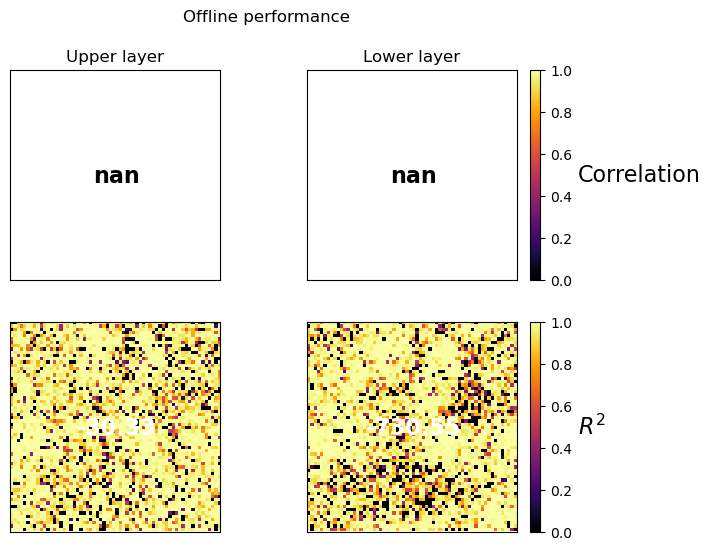

In [31]:
plt.figure(figsize=(7.6,6)).suptitle("Offline performance")

for z in [0,1]:
    plt.subplot(2,2,z+1,title=f"{['Upper','Lower'][z]} layer")
    imshow(preds1.q_subgrid_forcing_spatial_correlation.isel(lev=z))
    if z: colorbar("Correlation")
    
for z in [0,1]:
    plt.subplot(2,2,z+3)
    imshow(preds1.q_subgrid_forcing_spatial_skill.isel(lev=z))
    if z: colorbar("$R^2$")

## Online testing

In [32]:
import json
eddy_forcing1 = xr.open_zarr("gs://leap-persistent/pbluc/eddy/forcing1").isel(run=0).load()
param_run = param.run_online(**json.loads(eddy_forcing1.pyqg_params))

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized
INFO: Step: 1000, Time: 3.60e+06, KE: 1.59e-04, CFL: 0.030
INFO: Step: 2000, Time: 7.20e+06, KE: 2.64e-04, CFL: 0.036
INFO: Step: 3000, Time: 1.08e+07, KE: 3.51e-04, CFL: 0.042
INFO: Step: 4000, Time: 1.44e+07, KE: 4.38e-04, CFL: 0.050
INFO: Step: 5000, Time: 1.80e+07, KE: 4.93e-04, CFL: 0.042
INFO: Step: 6000, Time: 2.16e+07, KE: 5.58e-04, CFL: 0.052
INFO: Step: 7000, Time: 2.52e+07, KE: 5.88e-04, CFL: 0.056
INFO: Step: 8000, Time: 2.88e+07, KE: 6.65e-04, CFL: 0.054
INFO: Step: 9000, Time: 3.24e+07, KE: 6.28e-04, CFL: 0.054
INFO: Step: 10000, Time: 3.60e+07, KE: 5.99e-04, CFL: 0.056
INFO: Step: 11000, Time: 3.96e+07, KE: 5.73e-04, CFL: 0.048
INFO:

In [33]:
param_run

<xarray.Dataset>
Dimensions:            (time: 87, lev: 2, y: 64, x: 64, lev_mid: 1, l: 64, k: 33)
Coordinates:
  * time               (time) float64 0.0 3.6e+06 7.2e+06 ... 3.06e+08 3.096e+08
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * x                  (x) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * k                  (k) float64 0.0 6.283e-06 ... 0.0001948 0.0002011
Data variables: (12/27)
    q                  (time, lev, y, x) float64 4.452e-07 8.9e-07 ... 6.062e-07
    u                  (time, lev, y, x) float64 0.0 0.0 ... -0.003187 -0.004089
    v                  (time, lev, y, x) float64 0.0 0.0 ... -0.008487 -0.01706
    ufull              (time, lev, y, x) float64 0.025 0.025 ... -0.004089
    vfull              (time, lev, y, x) float64 0.0 0.0 ... -0.008487 -0.01706
    Ubg                (time, lev) float64 0.025 0.0 0.025 0.0 ... 0.0 0.025 0.0
    ...                 ...
    ENSgenspec         (time, l, k) float64 nan nan nan ... 2.099e-51 3.1e-61
    ENSfrictionspec    (time, l, k) float64 nan nan nan ... -3.441e-50 -1.18e-59
    APEgenspec         (time, l, k) float64 nan nan nan ... 4.723e-43 6.975e-53
    APEflux            (time, l, k) float64 nan nan nan ... 3.76e-28 6.754e-33
    KEflux             (time, l, k) float64 nan nan nan ... 1.41e-26 2.736e-31
    APEgen             (time) float64 nan nan nan ... 4.466e-11 4.457e-11
Attributes: (12/23)
    pyqg:beta:       1.5e-11
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         3600.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       311040000.0
    pyqg:twrite:     1000.0
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [34]:
eddy_model_highRes = xr.open_zarr("gs://leap-scratch/panalluri/eddy/highRes.zarr") 
eddy_model_lowRes = xr.open_zarr("gs://leap-scratch/panalluri/eddy/lowRes.zarr") 
eddy_model_lowRes

<xarray.Dataset>
Dimensions:            (time: 1, l: 64, k: 33, lev: 2, y: 64, x: 64, lev_mid: 1)
Coordinates:
  * k                  (k) float64 0.0 6.283e-06 ... 0.0001948 0.0002011
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * time               (time) float64 3.11e+08
  * x                  (x) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
Data variables: (12/32)
    APEflux            (time, l, k) float64 dask.array<chunksize=(1, 64, 33), meta=np.ndarray>
    APEgen             (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    APEgenspec         (time, l, k) float64 dask.array<chunksize=(1, 64, 33), meta=np.ndarray>
    Dissspec           (time, l, k) float64 dask.array<chunksize=(1, 64, 33), meta=np.ndarray>
    EKE                (time, lev) float64 dask.array<chunksize=(1, 2), meta=np.ndarray>
    EKEdiss            (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    ...                 ...
    u                  (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
    ufull              (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
    uh                 (time, lev, l, k) complex128 dask.array<chunksize=(1, 2, 64, 33), meta=np.ndarray>
    v                  (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
    vfull              (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
    vh                 (time, lev, l, k) complex128 dask.array<chunksize=(1, 2, 64, 33), meta=np.ndarray>
Attributes: (12/23)
    pyqg:L:          1000000.0
    pyqg:M:          4096
    pyqg:W:          1000000.0
    pyqg:beta:       1.5e-11
    pyqg:del2:       0.8
    pyqg:delta:      0.25
    ...              ...
    pyqg:tavestart:  155520000.0
    pyqg:tc:         172800
    pyqg:tmax:       311040000.0
    pyqg:twrite:     10000
    reference:       https://pyqg.readthedocs.io/en/latest/index.html
    title:           pyqg: Python Quasigeostrophic Model

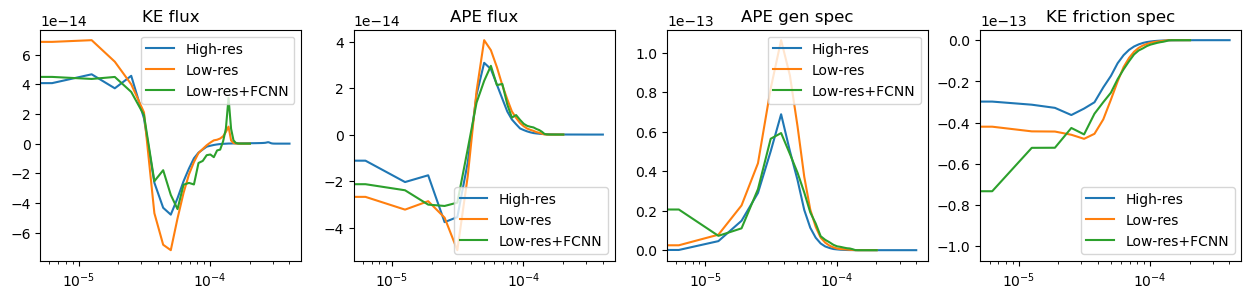

In [35]:
# Visualizing effects on upper-level PV
fig = plt.figure(figsize=(15.5,3))
plt.subplot(1,4,1, title='KE flux')
plt.semilogx(eddy_model_highRes.KEflux.k, eddy_model_highRes.KEflux.mean(dim='l').transpose(), label="High-res")
plt.semilogx(eddy_model_lowRes.KEflux.k, eddy_model_lowRes.KEflux.mean(dim='l').transpose(), label="Low-res")
plt.semilogx(param_run.KEflux.k, param_run.KEflux.mean(dim='time').mean(dim='l').transpose(), label="Low-res+FCNN")
plt.legend()
plt.subplot(1,4,2, title='APE flux')
plt.semilogx(eddy_model_highRes.APEflux.k, eddy_model_highRes.APEflux.mean(dim='l').transpose(), label="High-res")
plt.semilogx(eddy_model_lowRes.APEflux.k, eddy_model_lowRes.APEflux.mean(dim='l').transpose(), label="Low-res")
plt.semilogx(param_run.APEflux.k, param_run.APEflux.mean(dim='time').mean(dim='l').transpose(), label="Low-res+FCNN")
plt.legend()
plt.subplot(1,4,3, title='APE gen spec')
plt.semilogx(eddy_model_highRes.APEgenspec.k, eddy_model_highRes.APEgenspec.mean(dim='l').transpose(), label="High-res")
plt.semilogx(eddy_model_lowRes.APEgenspec.k, eddy_model_lowRes.APEgenspec.mean(dim='l').transpose(), label="Low-res")
plt.semilogx(param_run.APEgenspec.k, param_run.APEgenspec.mean(dim='time').mean(dim='l').transpose(), label="Low-res+FCNN")
plt.legend()
plt.subplot(1,4,4, title='KE friction spec')
plt.semilogx(eddy_model_highRes.KEfrictionspec.k, eddy_model_highRes.KEfrictionspec.mean(dim='l').transpose(), label="High-res")
plt.semilogx(eddy_model_lowRes.KEfrictionspec.k, eddy_model_lowRes.KEfrictionspec.mean(dim='l').transpose(), label="Low-res")
plt.semilogx(param_run.KEfrictionspec.k, param_run.KEfrictionspec.mean(dim='time').mean(dim='l').transpose(), label="Low-res+FCNN")
plt.legend()